In [19]:
from sklearn.metrics import classification_report, accuracy_score

### k\-Nearest Neighbors \(k\-NN\)



kNN would be well suited for this task because the number of values in the training data is only in the thousands. Additionally, it does not need to compute the values of the results rapidly. With these reasons and its simplicity, it was chosen as one of the models to use.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)

In [22]:
print(classification_report(y_val, knn_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.87      0.93      0.90       195
Ürgüp Sivrisi       0.92      0.85      0.88       180

     accuracy                           0.89       375
    macro avg       0.89      0.89      0.89       375
 weighted avg       0.89      0.89      0.89       375



In [23]:
print(accuracy_score(y_val, knn_pred))

0.8906666666666667


### Logistic Regression \(LR\)



For Logistic Regression, we tried out two different ways of implementing a Logistic Regression model which are `SGDClassifier` and `LogisticRegression`.


In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In this part, `SGDClassifier` is used with default parameters and a `random_state` of 2.

In [25]:
sgdc = SGDClassifier(random_state = 2)
sgdc.fit(X_train, y_train)
sgdc_pred = sgdc.predict(X_val)

In [26]:
print(classification_report(y_val, sgdc_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.88      0.90      0.89       195
Ürgüp Sivrisi       0.89      0.86      0.87       180

     accuracy                           0.88       375
    macro avg       0.88      0.88      0.88       375
 weighted avg       0.88      0.88      0.88       375



In [27]:
print(accuracy_score(y_val, sgdc_pred))

0.88


Here, `LogisticRegression` is used also with default parameters and a `random_state` of 2.

In [28]:
sgd = LogisticRegression(random_state = 2)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_val)

In [29]:
print(classification_report(y_val, sgd_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.88      0.92      0.90       195
Ürgüp Sivrisi       0.91      0.87      0.89       180

     accuracy                           0.90       375
    macro avg       0.90      0.89      0.90       375
 weighted avg       0.90      0.90      0.90       375



In [30]:
print(accuracy_score(y_val, sgd_pred))

0.896


## <span style='font-size:x-large'>Multilayer Perceptrons \(MLP\)</span>



For Neural Networks, Multilayer Perceptrons or MLP is the specific model used. It is theoretically more powerful than LR. The data has many features where the range of values of the different seed types overlap. MLP might be able to find a pattern using the combination of different features to classify the seeds well despite of these overlaps. MLP is a feedforward neural network algorithm.


In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
mlp = MLPClassifier(random_state = 2)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
print(accuracy_score(y_test, mlp_pred))

0.9013333333333333


## Feature selection and Hyperparameter tuning



In this step, all models will undergo feature selection and hyperparameter tuning to find the best features and hyperparameters that each model will use to produce the highest prediction accuracy.


### k\-Nearest Neighbors \(k\-NN\)



**Hyperparameter tuning using GridSearchCV**

Hyperparameter tuning using `GridSearchCV` performs cross validation on all possible combinations of the hyperparameters. In this case, we have 2 variables that we can tune for SKLearn's implementation of kNN: `n_neighbors` and `weights`. The weights of 1 to 20 were chosen as an arbitrary relatively small range. Had these values yielded poor results, the range of values would be adjusted. But, because of their good accuracy scores they were kept.


In [34]:
hyperparameters = [
    {
        "n_neighbors": list(range(1, 21)),
        "weights": ['uniform', 'distance']
    }
]

In [35]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                          'weights': ['uniform', 'distance']}])

In [36]:
print('Best parameters found:\n', clf.best_params_)
y_pred = clf.predict(X_val)
print("Best accuracy: ", (accuracy_score(y_val, y_pred) * 100), "%")
print(classification_report(y_val, y_pred))

Best parameters found:
 {'n_neighbors': 19, 'weights': 'uniform'}
Best accuracy:  89.60000000000001 %
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.94      0.90       195
Ürgüp Sivrisi       0.93      0.85      0.89       180

     accuracy                           0.90       375
    macro avg       0.90      0.89      0.90       375
 weighted avg       0.90      0.90      0.90       375



As seen in the results above, the best parameters to use for a kNN model is a `k` value of 19 and a `weights` value of `uniform`.  These settings gave the highest score using cross validation on the train data. It's accuracy on the validation set is 89.6%.

**Hyperparameter tuning using GridSearchCV and Feature Selection using Univariate Selection (SelectKbest + f_classif)**

Univariate feature selection can be done using SKLearn's `SelectKbest` function. Here we pass it the `f_classif` function so that it will calculate the ANOVA F-value of each feature to determine its significance in determining the label. This loop searches for the best combination of parameters for each of the best `k` features where `k` is a number from 1 to 12. It keeps the parameters that yield the best accuracy.

In [37]:
# Parameter selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_score = 0
best_grid = None

for k in range(1, pumpkin_seeds_df.shape[1]):
    kBest = SelectKBest(score_func = f_classif, k = k)
    best_features = kBest.fit(X_train, y_train)
    only_keep = best_features.get_feature_names_out()

    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, hyperparameters, n_jobs=-1, cv=3)
    clf.fit(X_train[only_keep], y_train)

    pred = clf.predict(X_val[only_keep])
    accuracy = accuracy_score(y_val, pred)

    if accuracy > best_score:
        best_score = accuracy
        best_grid = clf.best_params_
        best_grid["selected features"] = only_keep

print("Best grid: ", best_grid)
print("Best accuracy: ", (best_score * 100), "%")

Best grid:  {'n_neighbors': 19, 'weights': 'uniform', 'selected features': array(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Eccentricity', 'Solidity', 'Extent', 'Roundness',
       'Aspect_Ration', 'Compactness'], dtype=object)}
Best accuracy:  89.86666666666666 %


The results show that removing the feature `Equiv_Diameter` improves the score by .2%.

**Earlier Hyperparameter Tuning Method Testing**

In this earlier hyperparameter tuning method testing, a `ParameterGrid` is utilized with the separated raw and normalized data as options for hyperparameter tuning. 

```
 hyperparameters = [
     {
         "normal_data": [0, 1],
         "n_neighbors": list(range(1, 21)),
         "weights": ['uniform', 'distance']
     }
 ]
 from sklearn.model_selection import ParameterGrid
 best_score = 0

 for g in ParameterGrid(hyperparameters):
     X_cur_train, y_cur_train = (X_train, y_train)
     clf = KNeighborsClassifier()
     clf.set_params(n_neighbors = g["n_neighbors"], weights = g["weights"])

     clf.fit(X_cur_train, y_cur_train)

     pred = clf.predict(X_val)
     accuracy = accuracy_score(y_val, pred)

     print(g)
     print("Accuracy:", accuracy)

     if accuracy > best_score:
         best_score = accuracy
         best_grid = g

 print("Best accuracy: ", best_score, "%")
 print("Best grid: ", best_grid)
```

**Earlier Hyperparameter Tuning and Feature Selection Method Testing**

This testing includes hyperparemeter tuning and feature selection. `SelectKBest`, `f_classif`, and `ParameterGrid` were used to perform both methods.

```
# With feature selection (takes a long time to run)
 hyperparameters = [
     {
         "k-features": list(range(1, pumpkin_seeds_df.shape[1])),
         "n_neighbors": list(range(1, 21)),
         "weights": ['uniform', 'distance']
     }
 ]

 from sklearn.feature_selection import SelectKBest
 from sklearn.feature_selection import f_classif

 best_score = 0

 for g in ParameterGrid(hyperparameters):
     X_cur_train, y_cur_train = (X_train, y_train)

     test = SelectKBest(score_func = f_classif, k = g["k-features"])
     best_features = test.fit(X_cur_train, y_cur_train)
     only_keep = best_features.get_feature_names_out()
     X_cur_train = X_cur_train[only_keep]


     clf = KNeighborsClassifier()
     clf.set_params(n_neighbors = g["n_neighbors"], weights = g["weights"])

     clf.fit(X_cur_train, y_cur_train)

     pred = clf.predict(X_val[only_keep])
     accuracy = accuracy_score(y_val, pred)

     if accuracy > best_score:
         best_score = accuracy
         best_grid = g
         best_grid["selected features"] = best_features.get_feature_names_out()

 print("Best accuracy: ", best_score, "%")
 print("Best grid: ", best_grid)
```

**Plot of kNN with increasing K value and uniform distance**

This code plots the accuracy of a kNN classifier model as the value of `k` increases from 1 to 20.

In [38]:
accuracy = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, knn_pred)
    accuracy.append(acc)

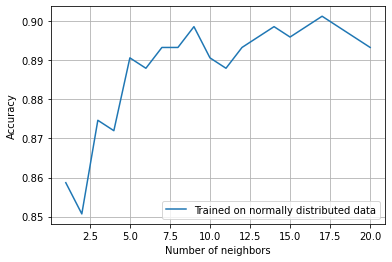

In [39]:
plt.plot(range(1,21), accuracy, label = "Trained on normally distributed data")
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [40]:
print("Best value of k:", accuracy.index(max(accuracy)) + 1)
print("Best accuracy of k: %.2f%%" % (max(accuracy) * 100))

Best value of k: 17
Best accuracy of k: 90.13%


This graph shows that the the accuracy and the number of neighbors have a positive correlation. Though the results of this visualization seem to indicate that the value of `k` produces better results when it is 17, keep in mind that the earlier parameter search used cross validation. Cross validation makes models less susceptible to overfitting, thus only values from the earlier tuning will be considered.

### Logistic Regression \(LR\)



**Hyperparameter tuning using GridSearchCV**

The first set of hyperparameters have `l2` or `none` as the values for penalty denoting that the model  does not perform any feature selection. The list of solvers chosen here are the ones that are capable of working with a penalty of `l2` and `none`. The values for C are an arbitrary range of values that were tweaked during testing to produce good scores.

In [41]:
hyperparameters = [
    {
        "penalty": ["l2"],
        "solver": ["newton-cg", "lbfgs", "sag"],
        "C": [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        "penalty": ["none"],
        "solver": ["newton-cg", "lbfgs", "sag"],
    }
]

In [42]:
from sklearn.model_selection import GridSearchCV
lgr = LogisticRegression(max_iter = 10000, random_state = 2)
clf = GridSearchCV(lgr, hyperparameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=2),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'penalty': ['none'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']}])

In [43]:
print('Best parameters found:\n', clf.best_params_)
y_pred = clf.predict(X_val)
print("Best accuracy: ", (accuracy_score(y_val, y_pred) * 100), "%")
print(classification_report(y_val, y_pred))

Best parameters found:
 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy:  89.33333333333333 %
               precision    recall  f1-score   support

   Çerçevelik       0.88      0.92      0.90       195
Ürgüp Sivrisi       0.91      0.87      0.89       180

     accuracy                           0.89       375
    macro avg       0.89      0.89      0.89       375
 weighted avg       0.89      0.89      0.89       375



The parameter search found that the best values for `C`, `penalty`, and `solver` are 10, `l2`, and `newton-cg` respectively. The accuracy of the tuned logistic regression classifier is 89.33% which is lower than the tuned kNN model and the tuned kNN model with feature selection.

**Hyperparameter tuning using GridSearchCV and Feature Selection using l1 (LASSO) penalty (+ liblinear solver)**

In this set of hyperparameters, both penalties `l2` and `l1` are considered to compare if a model that goes through feature selection produces a higher accuracy than a model that does not. Notably, the `l1` penalty or LASSO regression is a form of feature selection because it tends to give sparse data by zeroing out the weight of less important features. `liblinear` is chosen as the only solver because it is the only one that is capable of working with `l1` penalty.

In [44]:
# With feature selection
hyperparameters = [
    {
        "penalty": ["l1", "l2"],
        "C": [0.001, 0.01, 0.1, 1, 10, 100]
    }
]

In [45]:
from sklearn.model_selection import GridSearchCV
lgr = LogisticRegression(solver = "liblinear", max_iter = 10000, random_state = 2)
clf = GridSearchCV(lgr, hyperparameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, random_state=2,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2']}])

In [46]:
clf.best_estimator_.coef_

array([[ 0.24067727, -0.47855168,  0.43530614, -0.26806807,  1.17349112,
        -0.94694144,  1.92508032,  0.69731068,  0.02915466, -0.6167836 ,
         0.47332471, -0.55711101]])

In [47]:
print('Best parameters found:\n', clf.best_params_)
y_pred = clf.predict(X_val)
print("Best accuracy: ", accuracy_score(y_val, y_pred), "%")
print(classification_report(y_val, y_pred))

Best parameters found:
 {'C': 10, 'penalty': 'l2'}
Best accuracy:  0.8933333333333333 %
               precision    recall  f1-score   support

   Çerçevelik       0.88      0.92      0.90       195
Ürgüp Sivrisi       0.91      0.87      0.89       180

     accuracy                           0.89       375
    macro avg       0.89      0.89      0.89       375
 weighted avg       0.89      0.89      0.89       375



Here the parameter search found that `l2` penalty is better than `l1` penalty so we can say that performing feature selection through this method does not improve the accuracy.

**Hyperparameter tuning using GridSearchCV and Feature Selection using Univariate Selection (SelectKbest + f_classif)**

Apart from LASSO regression, we can use the same method used earlier on kNN to perform feature selection. Here we will test the best `k` features starting from 5 to 12. Starting the testing with `k = 5` helps reduce the amount of run time.

In [48]:
# Parameter selection using SelectKBest
hyperparameters = [
    {
        "penalty": ["l2"],
        "solver": ["newton-cg", "lbfgs", "sag"],
        "C": [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        "penalty": ["none"],
        "solver": ["newton-cg", "lbfgs", "sag"],
    }
]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_score = 0
best_grid = None

for k in range(5, pumpkin_seeds_df.shape[1]):
    kBest = SelectKBest(score_func = f_classif, k = k)
    best_features = kBest.fit(X_train, y_train)
    only_keep = best_features.get_feature_names_out()

    lgr = LogisticRegression(max_iter = 10000, random_state = 2)
    clf = GridSearchCV(lgr, hyperparameters, n_jobs=-1, cv=3)
    clf.fit(X_train[only_keep], y_train)

    pred = clf.predict(X_val[only_keep])
    accuracy = accuracy_score(y_val, pred)

    if accuracy > best_score:
        best_score = accuracy
        best_grid = clf.best_params_
        best_grid["selected features"] = only_keep

print("Best grid: ", best_grid)
print("Best accuracy: ", (best_score * 100), "%")

Best grid:  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg', 'selected features': array(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration',
       'Compactness'], dtype=object)}
Best accuracy:  89.60000000000001 %


Univariate feature selection improves the accuracy of the model by .3%. It removed 2 features: `Equiv_Diameter` and `Convex_Area`. This score matches the score of the kNN model with hyperparameter tuning but is still less than the kNN model with feature selection.

## <span style='font-size:x-large'>Multilayer Perceptrons \(MLP\)</span>



**Hyperparameter tuning using GridSearchCV**

The values for hidden size were chosen by getting the floor of two\-thirds of the number of features and adding or subtracting 1 \($\lfloor n * \frac{2}{3}\rfloor \pm1$ where n is the number of features\). The numbers for `alpha`, `batch_size`, and `learning_rate_init` are arbitrary numbers that were adjusted over the course of testing to improve accuracy. The solver `adam` and the activation function `relu` were chosen because they are somewhat fast and are just generally good defaults for neural network models.


In [49]:
hyperparameters = [
    {
        'alpha': [0.001, 0.01, 0.1],
        'hidden_layer_sizes': [(6,), (7,)],
        "batch_size": [275, 300, 325],
        "learning_rate_init": [0.01, 0.1, 1]
    }
]

In [50]:
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(solver = 'adam', max_iter = 10000, activation = "relu", random_state = 2)
clf = GridSearchCV(mlp, hyperparameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=10000, random_state=2),
             n_jobs=-1,
             param_grid=[{'alpha': [0.001, 0.01, 0.1],
                          'batch_size': [275, 300, 325],
                          'hidden_layer_sizes': [(6,), (7,)],
                          'learning_rate_init': [0.01, 0.1, 1]}])

In [51]:
print('Best parameters found:\n', clf.best_params_)
y_pred = clf.predict(X_val)
print("Best accuracy: ", (accuracy_score(y_val, y_pred) * 100), "%")
print(classification_report(y_val, y_pred))

Best parameters found:
 {'alpha': 0.01, 'batch_size': 300, 'hidden_layer_sizes': (7,), 'learning_rate_init': 0.1}
Best accuracy:  92.53333333333333 %
               precision    recall  f1-score   support

   Çerçevelik       0.92      0.94      0.93       195
Ürgüp Sivrisi       0.94      0.91      0.92       180

     accuracy                           0.93       375
    macro avg       0.93      0.92      0.93       375
 weighted avg       0.93      0.93      0.93       375



The parameter search found that the best values for `alpha`, `batch_size`, `hidden_layer_sizes`, and `learning_rate_init` are 0.01, 300, (7,), and 0.1 respectively. The accuracy of the tuned MLP classifier is 92.53% which is the highest that we have seen thus far among the other models.

**Hyperparameter tuning using GridSearchCV and Feature Selection using Univariate Selection (SelectKbest + f_classif)**



Here, we will apply the same univariate feature selection method used in the other two model types. Like the one in LR, this model will start with `k = 5` to reduce the length of time that this code needs to execute.

In [52]:
# Parameter selection

hyperparameters = {
    'alpha': [0.001, 0.01, 0.1],
    "batch_size": [275, 300, 325],
    "learning_rate_init": [0.01, 0.1, 1]
}

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_score = 0
best_grid = None

for k in range(5, pumpkin_seeds_df.shape[1]):
    kBest = SelectKBest(score_func = f_classif, k = k)
    best_features = kBest.fit(X_train, y_train)
    only_keep = best_features.get_feature_names_out()
    hidden_layers = int(k * 2 / 3)
    hyperparameters['hidden_layer_sizes'] = [(hidden_layers - 1,), (hidden_layers,), (hidden_layers + 1,)]

    mlp = MLPClassifier(solver = 'adam', max_iter = 10000, activation = "relu", random_state = 2)
    clf = GridSearchCV(mlp, hyperparameters, n_jobs=-1, cv=3)
    clf.fit(X_train[only_keep], y_train)

    pred = clf.predict(X_val[only_keep])
    accuracy = accuracy_score(y_val, pred)

    if accuracy > best_score:
        best_score = accuracy
        best_grid = clf.best_params_
        best_grid["selected features"] = only_keep

print("Best grid: ", best_grid)
print("Best accuracy: ", (best_score * 100), "%")

Best grid:  {'alpha': 0.1, 'batch_size': 275, 'hidden_layer_sizes': (7,), 'learning_rate_init': 0.1, 'selected features': array(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration',
       'Compactness'], dtype=object)}
Best accuracy:  92.26666666666667 %


Strangely, performing feature selection on the MLP model actually decreased its score by .27%.


**Earlier Hyperparameter Tuning Testing**

```
hyperparameters = [
    {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
        "random_state": [2],
    }
]
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(max_iter=1000)
clf = GridSearchCV(mlp, hyperparameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))
print(compute_accuracy(y_pred, y_val))
```

**Earlier Hyperparameter Tuning and Feature Selection Method Testing**

```
# With feature selection
hyperparameters = [
    {
        'activation': ['tanh', 'relu'],
        'alpha': [10, 50, 100],
        'hidden_layer_sizes': [(50,2), (50,), (100,)],
        "batch_size": [50, 100, 200, 50],
        "learning_rate_init": [0.0001, 0.001, 0.01],
        "random_state": [2],
    }
]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_score = 0
mlp = MLPClassifier(solver = 'adam', max_iter = 1000)

for g in ParameterGrid(hyperparameters):
    test = SelectKBest(score_func = f_classif, k = 7)
    best_features = test.fit(X_train, y_train)
    only_keep = best_features.get_feature_names_out()

    mlp.set_params(**{i: g[i] for i in g if i != "k-features"})

    mlp.fit(X_train[only_keep], y_train)

    pred = mlp.predict(X_val[only_keep])
    accuracy = accuracy_score(y_val, pred)

    if accuracy > best_score:
        best_score = accuracy
        best_grid = g
        best_grid["selected features"] = best_features.get_feature_names_out()

print("Best accuracy: ", best_score, "%")
print("Best grid: ", best_grid)
```

## Model Selection



| ML Models | Default Parameters | Hyperparameter Tuning | Feature Selection & Hyperparameter Tuning |
| :------------------------ | :----------------- | :-------------------- | :---------------------------------------- |
| kNN | 89.07% | 89.60% | 89.87% |
| LR \(SGDClassifier\) | 88.00% | \- | \- |
| LR \(LogisticRegression\) | 89.60% | 89.33% | 89.60% |
| MLP | 90.13% | 92.53% | 92.27% |



From the table above, it can be concluded that the MLP model with hyperparameter tuning has the best performance when trained on the training set and evaluated on the validation set. Because of this, it will be the final model that will be used. With the attained best accuracy of each machine learning model through experimentation, comparing to the paper, we have surpassed their accuracy in **k\-NN \(87.64% to 89.87%\)**, **Logistic Regression \(87.92% to 89.60%\)**, and **Multilayer Perceptron \(88.52% to 92.53%\)**.


In [53]:
best_params = {
    'alpha': 0.01,
    'batch_size': 300,
    'hidden_layer_sizes': (7,),
    'learning_rate_init': 0.1
}
final_clf = MLPClassifier(solver = 'adam', max_iter = 10000, activation = "relu", random_state = 2)
final_clf.set_params(**best_params)


MLPClassifier(alpha=0.01, batch_size=300, hidden_layer_sizes=(7,),
              learning_rate_init=0.1, max_iter=10000, random_state=2)

We can combine the testing and validation data into one set to train our model.

In [54]:
X_train_val = pd.concat([X_train, X_val])
y_train_val = np.concatenate((y_train, y_val))

In [55]:
final_clf.fit(X_train_val, y_train_val)

y_pred = final_clf.predict(X_test)
print("Best accuracy: ", accuracy_score(y_test, y_pred), "%")
print(classification_report(y_test, y_pred))

Best accuracy:  0.8986666666666666 %
               precision    recall  f1-score   support

   Çerçevelik       0.90      0.91      0.90       195
Ürgüp Sivrisi       0.90      0.89      0.89       180

     accuracy                           0.90       375
    macro avg       0.90      0.90      0.90       375
 weighted avg       0.90      0.90      0.90       375



#